# Step 1: Install necessary libraries

In [1]:
pip install mlxtend matplotlib

Note: you may need to restart the kernel to use updated packages.


# Step 2: Import libraries

In [40]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Load and preprocess your dataset

In [41]:
df = pd.read_csv('book.csv')
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
df.shape

(2000, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
df = df.astype(bool)
df.dtypes

ChildBks     bool
YouthBks     bool
CookBks      bool
DoItYBks     bool
RefBks       bool
ArtBks       bool
GeogBks      bool
ItalCook     bool
ItalAtlas    bool
ItalArt      bool
Florence     bool
dtype: object

In [7]:
book_counts = df.sum().sort_values(ascending=False)
book_counts

CookBks      862
ChildBks     846
DoItYBks     564
GeogBks      552
YouthBks     495
ArtBks       482
RefBks       429
ItalCook     227
Florence     217
ItalArt       97
ItalAtlas     74
dtype: int64

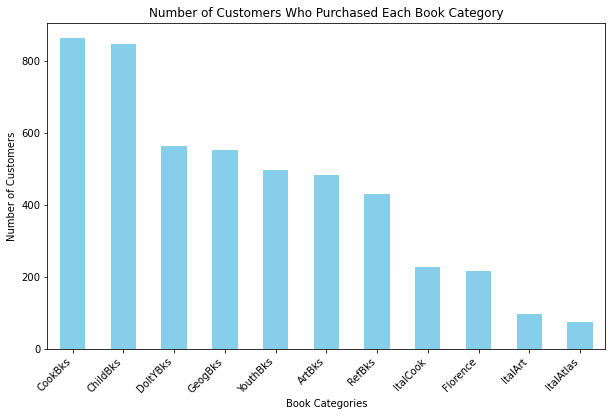

In [8]:
plt.figure(figsize=(10, 6))
book_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Customers Who Purchased Each Book Category")
plt.xlabel("Book Categories")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, ha='right')
plt.show()

In [9]:
support_values = df.sum() / df.shape[0]

support_df = pd.DataFrame(support_values, columns=["Support"]).sort_values("Support", ascending=False)
support_df

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145
ItalCook,0.1135
Florence,0.1085
ItalArt,0.0485


# Step 4: Apply Apriori algorithm with different support and confidence values

In [10]:
supports = [0.1, 0.15, 0.2, 0.25, 0.3] 
confidences = [0.5, 0.6, 0.7, 0.8, 0.9]  

for support in supports:
    for confidence in confidences:
       
        frequent_itemsets = apriori(df, min_support=support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        print(f"Support: {support}, Confidence: {confidence}, Number of Rules: {len(rules)}")

Support: 0.1, Confidence: 0.5, Number of Rules: 49
Support: 0.1, Confidence: 0.6, Number of Rules: 30
Support: 0.1, Confidence: 0.7, Number of Rules: 19
Support: 0.1, Confidence: 0.8, Number of Rules: 6
Support: 0.1, Confidence: 0.9, Number of Rules: 1
Support: 0.15, Confidence: 0.5, Number of Rules: 12
Support: 0.15, Confidence: 0.6, Number of Rules: 11
Support: 0.15, Confidence: 0.7, Number of Rules: 3
Support: 0.15, Confidence: 0.8, Number of Rules: 0
Support: 0.15, Confidence: 0.9, Number of Rules: 0
Support: 0.2, Confidence: 0.5, Number of Rules: 2
Support: 0.2, Confidence: 0.6, Number of Rules: 1
Support: 0.2, Confidence: 0.7, Number of Rules: 0
Support: 0.2, Confidence: 0.8, Number of Rules: 0
Support: 0.2, Confidence: 0.9, Number of Rules: 0
Support: 0.25, Confidence: 0.5, Number of Rules: 2
Support: 0.25, Confidence: 0.6, Number of Rules: 1
Support: 0.25, Confidence: 0.7, Number of Rules: 0
Support: 0.25, Confidence: 0.8, Number of Rules: 0
Support: 0.25, Confidence: 0.9, Numb

## Association Rules with 10% Support

In [11]:
Frequent_itemsets1 = apriori(df, min_support=0.1, use_colnames=True)
rules1=association_rules(Frequent_itemsets1, metric='lift', min_threshold=1)

In [12]:
rules10=rules1[['antecedents','consequents', 'support', 'confidence', 'lift' ]]
rules10.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
28,(CookBks),(ItalCook),0.1135,0.263341,2.320186
29,(ItalCook),(CookBks),0.1135,1.000000,2.320186
76,"(ArtBks, ChildBks)",(GeogBks),0.1020,0.627692,2.274247
81,(GeogBks),"(ArtBks, ChildBks)",0.1020,0.369565,2.274247
86,(ArtBks),"(CookBks, DoItYBks)",0.1015,0.421162,2.246196
83,"(CookBks, DoItYBks)",(ArtBks),0.1015,0.541333,2.246196
99,(GeogBks),"(CookBks, ArtBks)",0.1035,0.375000,2.245509
94,"(CookBks, ArtBks)",(GeogBks),0.1035,0.619760,2.245509
98,(ArtBks),"(CookBks, GeogBks)",0.1035,0.429461,2.230964
95,"(CookBks, GeogBks)",(ArtBks),0.1035,0.537662,2.230964


### - 50% Confidence

In [46]:
rules15=rules10[rules1['confidence']>0.5]
rules15.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
29,(ItalCook),(CookBks),0.1135,1.000000,2.320186
76,"(ArtBks, ChildBks)",(GeogBks),0.1020,0.627692,2.274247
83,"(CookBks, DoItYBks)",(ArtBks),0.1015,0.541333,2.246196
94,"(CookBks, ArtBks)",(GeogBks),0.1035,0.619760,2.245509
95,"(CookBks, GeogBks)",(ArtBks),0.1035,0.537662,2.230964
57,(RefBks),"(CookBks, ChildBks)",0.1225,0.571096,2.230842
78,"(ChildBks, GeogBks)",(ArtBks),0.1020,0.523077,2.170444
82,"(CookBks, ArtBks)",(DoItYBks),0.1015,0.607784,2.155264
64,"(CookBks, ChildBks)",(GeogBks),0.1495,0.583984,2.115885
69,(GeogBks),"(CookBks, ChildBks)",0.1495,0.541667,2.115885


### - 60% Confidence

In [ ]:
rules16=rules10[rules1['confidence']>0.6]
rules16.sort_values('lift', ascending=False).head(10)

### - 70% Confidence

In [ ]:
rules17=rules10[rules1['confidence']>0.7]
rules17.sort_values('lift', ascending=False).head(10)

### - 80% Confidence

In [ ]:
rules18=rules10[rules1['confidence']>0.8]
rules18.sort_values('lift', ascending=False).head(10)

### - 90% Confidence

In [ ]:
rules19=rules10[rules1['confidence']>0.9]
rules19.sort_values('lift', ascending=False).head(10)

## Association Rules with 15% Support

In [ ]:
Frequent_itemsets15 = apriori(df, min_support=0.15, use_colnames=True)
rules15=association_rules(Frequent_itemsets15, metric='lift', min_threshold=1)

In [ ]:
rules15=rules15[['antecedents','consequents', 'support', 'confidence', 'lift' ]]
rules15.sort_values('lift', ascending=False).head(10)
rules15.shape

### - 50% Confidence

In [ ]:
rules155=rules15[rules15['confidence']>0.5]
rules155.sort_values('lift', ascending=False).head(10)

### - 60% Confidence

In [ ]:
rules156=rules15[rules15['confidence']>0.6]
rules156.sort_values('lift', ascending=False).head(10)

### - 70% Confidence

In [ ]:
rules157=rules15[rules15['confidence']>0.7]
rules157.sort_values('lift', ascending=False).head(10)

## Association Rules with 20% Support

In [ ]:
Frequent_itemsets2 = apriori(df, min_support=0.2, use_colnames=True)
rules2=association_rules(Frequent_itemsets2, metric='lift', min_threshold=1)

In [ ]:
rules2=rules2[['antecedents','consequents', 'support', 'confidence', 'lift' ]]
rules2.sort_values('lift', ascending=False).head(10)

### - 50% Confidence

In [ ]:
rules25=rules2[rules2['confidence']>0.5]
rules25.sort_values('lift', ascending=False).head(10)

### - 60% Confidence

In [ ]:
rules26=rules2[rules2['confidence']>0.6]
rules26.sort_values('lift', ascending=False).head(10)

## Association Rules with 25% Support

In [ ]:
Frequent_itemsets25 = apriori(df, min_support=0.2, use_colnames=True)
rules25=association_rules(Frequent_itemsets25, metric='lift', min_threshold=1)

In [ ]:
rules25=rules25[['antecedents','consequents', 'support', 'confidence', 'lift' ]]
rules25.sort_values('lift', ascending=False).head(10)

### - 50% Confidence

In [ ]:
rules255=rules25[rules2['confidence']>0.5]
rules255.sort_values('lift', ascending=False).head(10)

### - 60% Confidence

In [ ]:
rules256=rules2[rules2['confidence']>0.6]
rules256.sort_values('lift', ascending=False).head(10)

# Step 5: Change the minimum length in Apriori algorithm

### Minimum Length for Apriori: 2

In [22]:
frequent_itemsets_ln2 = apriori(df, min_support=0.1, use_colnames=True, max_len=2)
rules_ln2 = association_rules(frequent_itemsets_ln2, metric="confidence", min_threshold=0.5)
rules_ln2.shape

(16, 10)

In [23]:
rules_ln2=rules_ln2[['antecedents','consequents', 'support', 'confidence', 'lift' ]]
rules_ln2.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
12,(ItalCook),(CookBks),0.1135,1.000000,2.320186
15,(ArtBks),(GeogBks),0.1275,0.529046,1.916832
14,(RefBks),(GeogBks),0.1105,0.515152,1.866491
13,(ArtBks),(DoItYBks),0.1235,0.512448,1.817192
6,(GeogBks),(ChildBks),0.1950,0.706522,1.670264
4,(RefBks),(ChildBks),0.1515,0.706294,1.669725
9,(RefBks),(CookBks),0.1525,0.710956,1.649549
11,(GeogBks),(CookBks),0.1925,0.697464,1.618245
10,(ArtBks),(CookBks),0.1670,0.692946,1.607763
5,(ArtBks),(ChildBks),0.1625,0.674274,1.594028


### Minimum Length for Apriori: 3

In [24]:
frequent_itemsets_ln3 = apriori(df, min_support=0.1, use_colnames=True, max_len=3)
rules_ln3 = association_rules(frequent_itemsets_ln3, metric="confidence", min_threshold=0.5)
rules_ln3.shape

(49, 10)

In [25]:
rules_ln3=rules_ln3[['antecedents','consequents', 'support', 'confidence', 'lift' ]]
rules_ln3.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
12,(ItalCook),(CookBks),0.1135,1.000000,2.320186
37,"(ArtBks, ChildBks)",(GeogBks),0.1020,0.627692,2.274247
41,"(CookBks, DoItYBks)",(ArtBks),0.1015,0.541333,2.246196
46,"(CookBks, ArtBks)",(GeogBks),0.1035,0.619760,2.245509
47,"(CookBks, GeogBks)",(ArtBks),0.1035,0.537662,2.230964
26,(RefBks),"(CookBks, ChildBks)",0.1225,0.571096,2.230842
39,"(ChildBks, GeogBks)",(ArtBks),0.1020,0.523077,2.170444
40,"(CookBks, ArtBks)",(DoItYBks),0.1015,0.607784,2.155264
30,"(CookBks, ChildBks)",(GeogBks),0.1495,0.583984,2.115885
33,(GeogBks),"(CookBks, ChildBks)",0.1495,0.541667,2.115885


# Step 6: Visualize the obtained rules using different plots

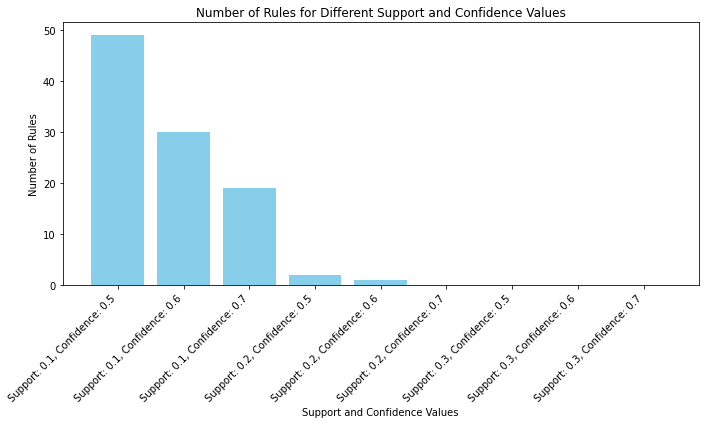

In [14]:
support_values = np.array([0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3])
confidence_values = np.array([0.5, 0.6, 0.7, 0.5, 0.6, 0.7, 0.5, 0.6, 0.7])
num_rules = np.array([49, 30, 19, 2, 1, 0, 0, 0, 0])


plt.figure(figsize=(10, 6))
plt.bar(range(len(num_rules)), num_rules, color='skyblue')
plt.xticks(range(len(num_rules)), [f"Support: {s}, Confidence: {c}" for s, c in zip(support_values, confidence_values)], rotation=45, ha='right')
plt.xlabel('Support and Confidence Values')
plt.ylabel('Number of Rules')
plt.title('Number of Rules for Different Support and Confidence Values')
plt.tight_layout()
plt.show()

### At Support 10% and Confidence 70%

In [26]:
Frequent_itemsets_fnl = apriori(df, min_support=0.1, use_colnames=True)
rules_fnl=association_rules(Frequent_itemsets_fnl, metric='confidence', min_threshold=0.7)

In [27]:
rules_fnl1=rules_fnl[['antecedents','consequents', 'support', 'confidence', 'lift' ]]
rules_fnl1.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
3,(ItalCook),(CookBks),0.1135,1.000000,2.320186
16,"(ArtBks, DoItYBks)",(CookBks),0.1015,0.821862,1.906873
17,"(DoItYBks, GeogBks)",(CookBks),0.1085,0.818868,1.899926
8,"(CookBks, RefBks)",(ChildBks),0.1225,0.803279,1.899004
15,"(ArtBks, GeogBks)",(ChildBks),0.1020,0.800000,1.891253
18,"(ArtBks, GeogBks)",(CookBks),0.1035,0.811765,1.883445
5,"(CookBks, YouthBks)",(ChildBks),0.1290,0.796296,1.882497
9,"(ChildBks, RefBks)",(CookBks),0.1225,0.808581,1.876058
14,"(DoItYBks, GeogBks)",(ChildBks),0.1045,0.788679,1.864490
7,"(DoItYBks, ChildBks)",(CookBks),0.1460,0.793478,1.841017


In [42]:
for index, row in rules_fnl.iterrows():
    antecedents = ', '.join(row['antecedents'])
    consequents = ', '.join(row['consequents'])
    
    print("Rule: " + antecedents + " -> " + consequents)
    print("Support: " + str(row['support']))
    print("Confidence: " + str(row['confidence']))
    print("Lift: " + str(row['lift']))
    print("=====================================")


Rule: RefBks -> ChildBks
Support: 0.1515
Confidence: 0.7062937062937062
Lift: 1.669725073980393
Rule: GeogBks -> ChildBks
Support: 0.195
Confidence: 0.7065217391304347
Lift: 1.6702641587007914
Rule: RefBks -> CookBks
Support: 0.1525
Confidence: 0.710955710955711
Lift: 1.649549213354318
Rule: ItalCook -> CookBks
Support: 0.1135
Confidence: 1.0
Lift: 2.320185614849188
Rule: YouthBks, ChildBks -> CookBks
Support: 0.129
Confidence: 0.7818181818181819
Lift: 1.8139632988820924
Rule: CookBks, YouthBks -> ChildBks
Support: 0.129
Confidence: 0.7962962962962963
Lift: 1.8824971543647666
Rule: CookBks, DoItYBks -> ChildBks
Support: 0.146
Confidence: 0.7786666666666666
Lift: 1.8408195429472025
Rule: DoItYBks, ChildBks -> CookBks
Support: 0.146
Confidence: 0.7934782608695652
Lift: 1.8410168465651164
Rule: CookBks, RefBks -> ChildBks
Support: 0.1225
Confidence: 0.8032786885245902
Lift: 1.8990039917839012
Rule: ChildBks, RefBks -> CookBks
Support: 0.1225
Confidence: 0.8085808580858086
Lift: 1.87605767

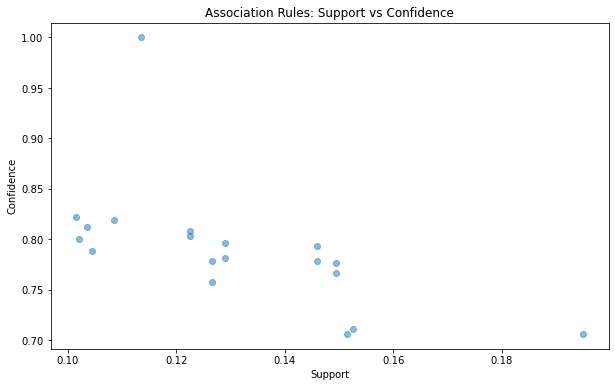

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(rules_fnl['support'], rules_fnl['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.show()

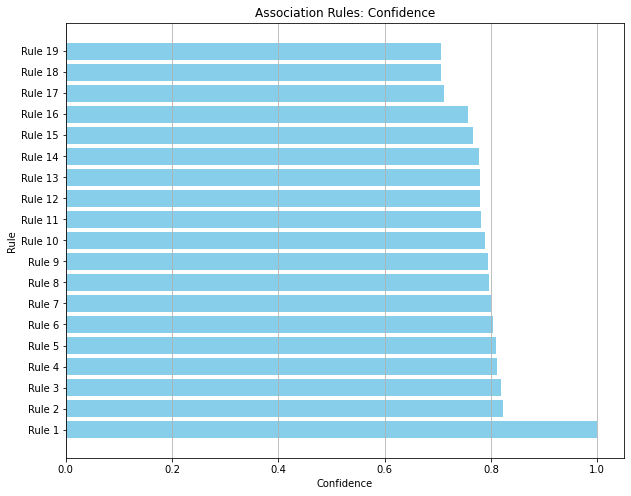

In [32]:
rules_fnl_sorted = rules_fnl.sort_values(by='confidence', ascending=False)
plt.figure(figsize=(10, 8))
plt.barh(range(len(rules_fnl_sorted)), rules_fnl_sorted['confidence'], color='skyblue')
plt.yticks(range(len(rules_fnl_sorted)), [f"Rule {i+1}" for i in range(len(rules_fnl_sorted))])
plt.xlabel('Confidence')
plt.ylabel('Rule')
plt.title('Association Rules: Confidence')
plt.grid(axis='x')
plt.show()

### At Support 20% and Confidence 60%

In [20]:
Frequent_itemsets_fnl2 = apriori(df, min_support=0.2, use_colnames=True)
rules_fnl2=association_rules(Frequent_itemsets_fnl2, metric='confidence', min_threshold=0.6)

In [21]:
rules_fnl2=rules_fnl2[['antecedents','consequents', 'support', 'confidence', 'lift' ]]
rules_fnl2.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
0,(ChildBks),(CookBks),0.256,0.605201,1.404179


In [44]:
for index, row in rules_fnl2.iterrows():
    antecedents = ', '.join(row['antecedents'])
    consequents = ', '.join(row['consequents'])
    
    print("Rule: " + antecedents + " -> " + consequents)
    print("Support: " + str(row['support']))
    print("Confidence: " + str(row['confidence']))
    print("Lift: " + str(row['lift']))
    print("=====================================")


Rule: ChildBks -> CookBks
Support: 0.256
Confidence: 0.6052009456264775
Lift: 1.4041785281356787


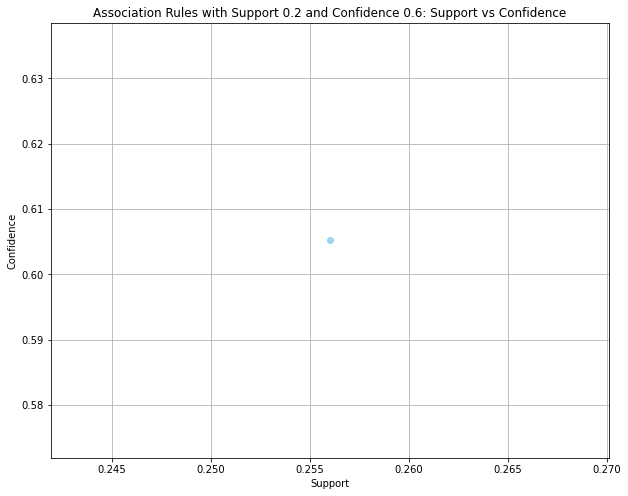

In [39]:
plt.figure(figsize=(10, 8))
plt.scatter(rules_fnl2['support'], rules_fnl2['confidence'], alpha=0.8, c='skyblue')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules with Support 0.2 and Confidence 0.6: Support vs Confidence')
plt.grid(True)
plt.show()

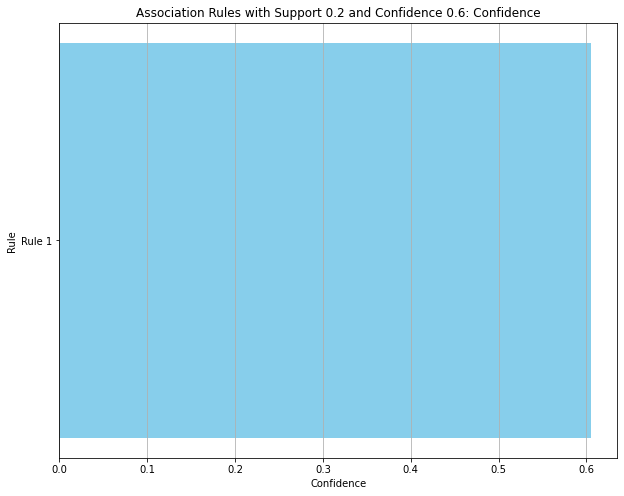

In [38]:
rules_fnl2_sorted = rules_fnl2.sort_values(by='confidence', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(range(len(rules_fnl2_sorted)), rules_fnl2_sorted['confidence'], color='skyblue')
plt.yticks(range(len(rules_fnl2_sorted)), [f"Rule {i+1}" for i in range(len(rules_fnl2_sorted))])
plt.xlabel('Confidence')
plt.ylabel('Rule')
plt.title('Association Rules with Support 0.2 and Confidence 0.6: Confidence')
plt.grid(axis='x')
plt.show()

- In summary, the association rule analysis revealed a notable association between the purchase of ChildBks (Children's Books) and CookBks (Cookbooks), with a support of 0.256, indicating that this association occurs in approximately 25.6% of transactions. The confidence value of 0.605201 suggests that there is a 60.52% chance that if a customer buys ChildBks, they will also buy CookBks. Additionally, the lift value of 1.404179 indicates that the likelihood of purchasing CookBks increases by approximately 40.42% when ChildBks are also purchased, compared to their individual probabilities.

## ---END---